In [139]:
''' Create a Linear Regression Model using Python/R to predict home prices using Boston
Housing Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset
contains information about various houses in Boston through different parameters. There
are 506 samples and 14 feature variables in this dataset. The objective is to predict the
value of prices of the house using the given features'''

' Create a Linear Regression Model using Python/R to predict home prices using Boston\nHousing Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset\ncontains information about various houses in Boston through different parameters. There\nare 506 samples and 14 feature variables in this dataset. The objective is to predict the\nvalue of prices of the house using the given features'

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [141]:
data = pd.read_csv("HousingData.csv")

In [142]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [143]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9


In [144]:
print("The shape of the data is: ")
data.shape

The shape of the data is: 


(506, 14)

In [145]:
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [146]:
# remove missing values with thier average
avg_crim = data["CRIM"].astype("float").mean(axis = 0)
print("Average of crim is: ",avg_crim)

Average of crim is:  3.6118739711934156


In [147]:
data["CRIM"].replace(np.nan,avg_crim,inplace = True)

In [148]:
avg_zn = data["ZN"].astype("float").mean(axis = 0)
data["ZN"].replace(np.nan,avg_zn,inplace = True)

avg_indus = data["INDUS"].astype("float").mean(axis = 0)
data["INDUS"].replace(np.nan,avg_indus,inplace = True)

avg_chas = data["CHAS"].astype("float").mean(axis = 0)
data["CHAS"].replace(np.nan,avg_chas,inplace = True)

avg_age = data["AGE"].astype("float").mean(axis = 0)
data["AGE"].replace(np.nan,avg_age,inplace = True)

avg_lstat = data["LSTAT"].astype("float").mean(axis = 0)
data["LSTAT"].replace(np.nan,avg_lstat,inplace = True)

In [149]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [150]:
X = data.iloc[:,0:13]
y = data.iloc[:,-1]

In [151]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=0)

In [152]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [153]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
  
# predicting the test set results
y_pred = regressor.predict(X_test)

In [154]:
print(y_pred)

[26.175296   22.64747588 29.1456294  11.52971235 21.65312134 19.42320699
 20.18413017 21.46914355 19.1985363  19.98228162  4.32483046 16.16891668
 16.87682404  5.31232373 39.36827861 33.09358732 21.9152876  36.61918436
 31.52676377 23.52713482 24.96022461 23.69866912 20.88033802 30.55074901
 22.74081741  8.66805959 17.65119072 17.93088633 36.01223185 21.16299556
 17.83464361 17.43306603 19.5240167  23.50605522 28.97262793 19.21808862
 11.23997435 23.94256597 17.86786717 15.40849806 26.3630836  21.5193299
 23.78733694 14.84041522 23.9445175  24.97067627 20.11366175 23.08636158
 10.42208266 24.52832122 21.60847326 18.66228165 24.53362832 31.03502944
 12.97457826 22.38536236 21.34822822 16.10928673 12.37477824 22.78596712
 18.28714824 21.91802045 32.49771603 31.21256855 17.47867791 33.18861907
 19.17896285 19.94662594 20.17142015 23.90228857 22.81288844 24.17911208
 30.83402844 28.87481037 25.14581721  5.55072029 37.0183454  24.15428003
 27.67587636 19.63884644 28.74874123 18.83204358 17.

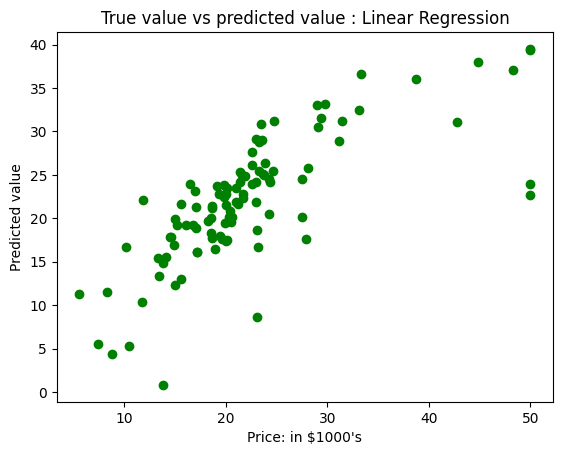

In [156]:
plt.scatter(y_test, y_pred, c = 'green')
plt.xlabel("Price: in $1000's")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Linear Regression")
plt.show()